<h1> ML Assignment 2: Report </h1>

<hr> <h2> Introduction

<hr> <h3> Task </h3> <p> The task that was chosen by us involved the use of scheduler which will pop an item from any of the three provided queues. From these queues the mean delay would be calculated for each queue which refers to the average delay for all packets in the queue which would be measured in timeslots. The Qos constraints can be seen in figure 1.
    
Every timeslot a certain amount of each packet will enter the queue. As seen in figure 2, the goal of the scheduler is to maintain the mean delay for queue 1 and 2 to be under the mean delay requirement, whilst minimizing the mean delay for the best effort queue. This will be performed under the following scenarios:</p>
    
<b>Scenario 1:</b> <p>The scheduler per timeslot can either pop a packet off queue 1, queue 2 or queue 3 for a total of 3 possible actions.</p>
<b>Scenario 2:</b> <p>The scheduler per timeslot can either pop its current queue or switch to one of the other queues, given that there will be two other queues at all times. This means there is a defined action space of 3 as well.</p> 

<h3> Approach </h3>


<p>In open AI gym, an environment will be set up allowing for visualization of the waiting time for each queue using Reinforced Learning. The objective of this will be to allow an agent to find an optimal policy over time through trial and error, iteratively mapping states to actions and maximizing the cumulative reward over time. Furthermore, with the environment set up, the following q-learning formula will be the basis of our baseline model.</p>
$Q(s,a)=Q(s,a)+learningrate*(reward+gamma*max(Q(s',a'))-Q(s,a))$
<p>This specific formula is the update equation in which the new Q-value based on the current Q-value, the reward, and the estimated maximum future Q-value. These Q-values are then updated iteratively as the agent interacts with the environment, allowing it to learn the optimal policy for maximizing long-term rewards. </p>
 
<p>Within this environment, we have established three actions:</p>
<b>Scenario 1:</b>popping packets from queue 1, 2, or 3 or for scenario. 
<p><b>Scenario 2:</b>popping from the current queue or switching to another queue (counts as 2 actions, as there are 2 other queues)</p>
<p> We have also defined the observation space to be a discrete space including 1000000000 different possibilities in order to simplify the process for the q-learning algorithm. After the baseline model is set up, further advancements to the model will be made by adjusting the hyperparameters of the q-learning model and the best hyper parameters will be selected as the final model for this task </p>

<h2> Implementation </h2> <hr>

<h3> Baseline Model And Environment: </h3>

This model will be trained in our custom open gym environment, over a period of 1500 episodes which all continue for a maximum of 100 steps. The model will reward a +1 score if it improves the mean delay of the best effort queue and penalize -1 score if it increases the size of the best effort queue. The model also penalizes -10 for going over the mean delay requirement for queue 1 and queue 2. The goal of the model is to essentially empty the three queues, so if all three queues are empty the model is rewarded a +25 score and deduct -25 score if the model pops from an empty queue when there is packets in the other queues. 

Each episode, the arrival rates for each queue will be a randomized , however under the condition that the sum of the three arrival rates still equal within the range of 0.9 to 1.5. This was done to ensure that the model doesn't incur unfair penalties. The model will then be evaluated on using the average cumulative reward and each episode will be plotted to determine whether the model has converged on a select policy. 

The base model will have gamma and learning rates of 0.1. These will be further tuned to optimize but the results for the baseline model is as seen in figure 3 and 4, with Scenario 1 having an average cumulative reward score of -492.765 and Scenario 2 an average of -415.6773333333333. 

<h3> Hyperparameter Tuning: </h3>

The hyperparameters being tuned will be the learning rate and gamma value. The gamma value will be initially measured from 0.1 to 0.9 in increments of 0.1. The learning rate will be measured from 0.1 to 0.5 in increments of 0.1 as well, the learning rate will be limited to maximum 0.5 to avoid any oscillation or overshooting issues that may occur and cause the model to not converge. The hyperparameters will be tested using a grid search method by calculating the average cumulative reward for each permutation of gamma and learning rate for 400 episodes per permutation to reduce computational complexity. The model with the best average cumulative reward will be selected as the final model. 

As seen in figure 5 and 6, it was found the optimal hyperparameters were:
<b>Scenario 1:</b> Gamma: 0.6 Learning Rate: 0.5
<b>Scenario 2:</b> Gamma: 0.2 Learning Rate: 0.5



<h3> Testing Final Model: </h3>

The final model was tested on an arrival rate of [0.3, 0.4, 0.4]. This specific permutation of arrival rates has been excluded from the training process in order to encourage consistency. This way, there would be no way for the model to have randomnly acquired training on this specific set of arrival rates, rather making the model rely on its q-table for the states it has encountered with different arrival rates which is the goal of our model. This test was be done over the course of the 50 episodes and produced the following results:

| Scenario               | Gamma | Learnin Rate | Score |
|----------------------|----------------|------------------|-------------------|
| Scenario 1 | 0.6              | 0.5              | 147               |
| Scenario 2 | 0.2              | 0.5              | 132.6               |

It is evident from comparing figure 9 and 10, as well as comparing figure 7 and 8, that Scenario 1 performed better with q learning than Scenario 2.

## Independant Evaluation 
To test our machine learning model, we tested in similar environment against other popular scheduling policy, including FIFO, EDF and SP. Predictively First in first out performed the worst, while EDF and SP functioned quite similarly, as well as the ML performing on a similar level. With the arrival rates set to 0.3,0.4 and 0.4. choosing an arrival rate any lower than this we would not be able to differentiate between the models. Results can be seen in figure 7


Considering we only have 3 queues, and only able to transmit one packet at a time, this is a pretty managable stream. Therefore in scenarios like this an EDF or SP would be much better and simpler to use than our ML. When we consider the overhead with training and finding optimal values aswell, EDF and SP are definietly the better choice here. However in a scenario with more complex queues and delay requirement the ML policy could still be more effective.
<hr>

## Conclusion

-Summarise findings

-Limitation: If our total arrival rates are increased over the 1.5. Our model would not be able to keep up with EDF and SP since our training is limited to 1.5. This could be easily countered by making our training rates even larger as well as increasing the number of training data. Of course, this does increase overhead cost. Best scenario would be to know what the maximum number of incoming packets can get in a real-world environment and train the model accordingly.

-Future Directions

-Overall impact

<h2> Appendix </h2> <hr>

| Metric               | Priority Queue | Priority Queue 2 | Best Effort Queue |
|----------------------|----------------|------------------|-------------------|
| Mean Delay Requirement | 6              | 4                | inf               |

                                                    Figure 1: Qos table

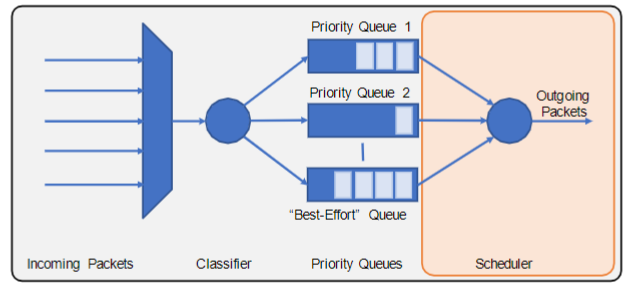
<p style="text-align: center;">Figure 2: Explanation of Task</p>


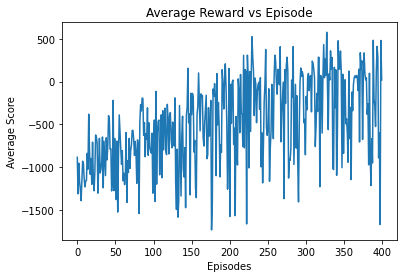<p style="text-align: center;">Figure 3: Scenario 1: Baseline Model Cumulative Rewards</p>

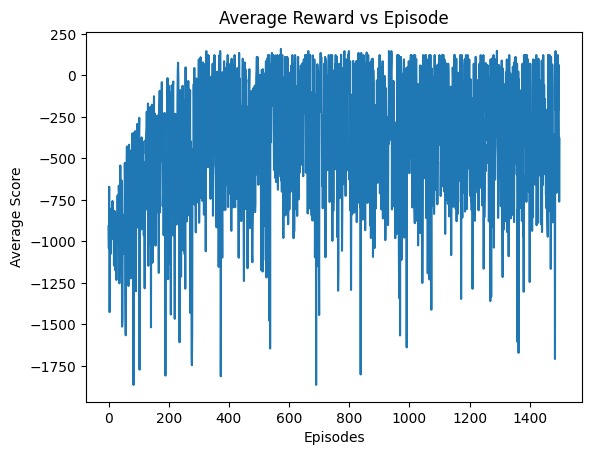<p style="text-align: center;">Figure 4: Scenario 2: Baseline Model Cumulative Rewards</p>

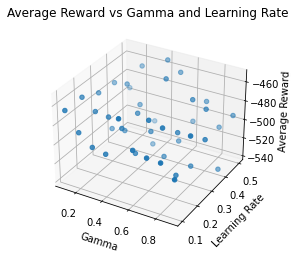
<p style="text-align: center;">Figure 5: Scenario 1 Grid Search for optimal learning rate and gamma using average cumulative rewards</p>


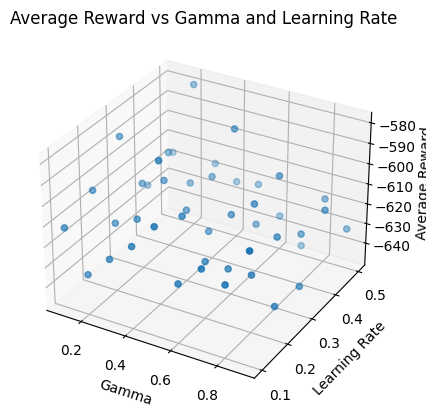<p style="text-align: center;">Figure 6: Scenario 2 Grid Search for optimal learning rate and gamma using average cumulative rewards</p>


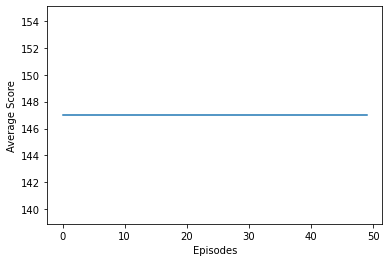<p style="text-align: center;">Figure 7: Scenario 1 Plot of final model test over 50 episodes</p>


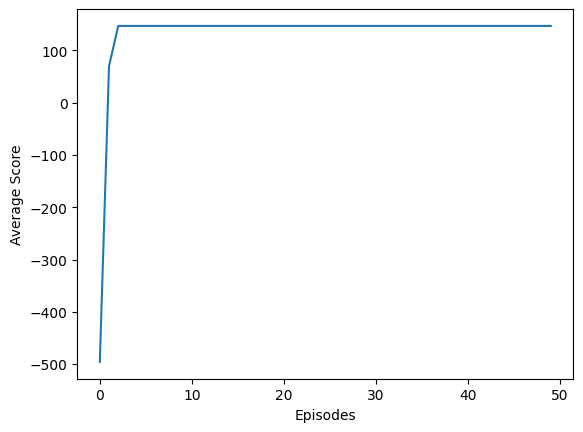<p style="text-align: center;">Figure 8: Scenario 2 Plot of final model test over 50 episodes</p>


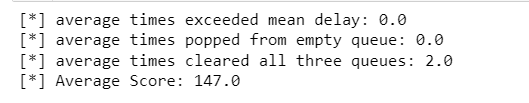<p style="text-align: center;">Figure 9: Scenario 1 output of final model test</p>

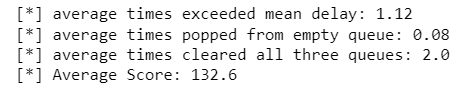<p style="text-align: center;">Figure 10: Scenario 2 output of final model test</p>

| Algorithm | FIFO | SP  | EDF | ML  |
|-----------|------|-----|-----|-----|
| Rewards   | -61  | 148 | 148 | 147 |

                                                Figure 11: Independant Evaluation table